In [1]:
%matplotlib inline
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import load_breast_cancer

In [2]:
cancer=load_breast_cancer()   #Load dataset

## 1.Examining the relation between features

In [3]:
#---Copy from dataset into a 2-d list---
Z=[]
for target in range(2):
    Z.append([[],[]])
    for i in range(len(cancer.data)):                # target is 0 or 1
        if cancer.target[i]==target:
            Z[target][0].append(cancer.data[i][0])   #first feature- mean radius
            Z[target][1].append(cancer.data[i][1])   #second feature- mean texture

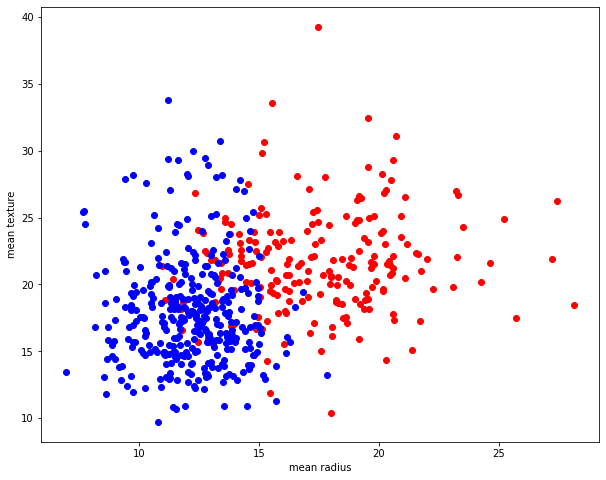

In [4]:
colours=("r","b")          #r:malignant,   b:benign
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
for target in range(2):
    ax.scatter(Z[target][0],
              Z[target][1],
              c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

### Plotting in 3D

In [5]:
Z=[]
for target in range(2):
    Z.append([[],[], []])
    for i in range(len(cancer.data)):                # target is 0 or 1
        if cancer.target[i]==target:
            Z[target][0].append(cancer.data[i][0])   
            Z[target][1].append(cancer.data[i][1])
            Z[target][2].append(cancer.data[i][2]) 

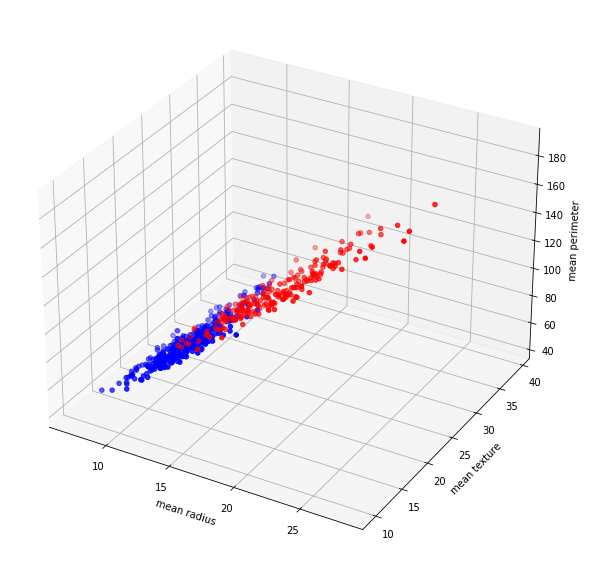

In [6]:
colours=("r","b")          #r:malignant,   b:benign
fig=plt.figure(figsize=(10,15))
ax=fig.add_subplot(111,projection='3d')
for target in range(2):
    ax.scatter(Z[target][0],
              Z[target][1],
              Z[target][2],
              c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.set_zlabel("mean perimeter")
plt.show()

## 2.Training Using One Feature

In [7]:
cancer=load_breast_cancer()   #Load dataset
x=cancer.data[:,0]            #mean radius
y=cancer.target               #0: malignant, 1:benign
colors={0:'red',1:'blue'}     #0: malignant, 1:benign

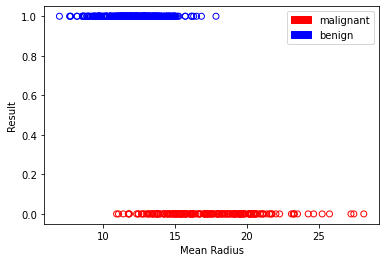

In [8]:
plt.scatter(x,y,facecolors='none',
            edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),
           cmap=colors)
plt.xlabel('Mean Radius')
plt.ylabel('Result')

red=mpatches.Patch(color='red', label='malignant')
blue=mpatches.Patch(color='blue', label='benign')

plt.legend(handles=[red,blue],loc=1)

### Finding the Intercept and Coefficient

In [9]:
log_regress=linear_model.LogisticRegression()

#-----train the model---
log_regress.fit(X=np.array(x).reshape(len(x),1),
               y=y)

#-----print trained model intercept---
print(log_regress.intercept_)

[15.120902]


In [10]:
#-----print trained model coefficients---
print(log_regress.coef_)

[[-1.02475609]]


### Plotting the Sigmoid Curve

Text(0, 0.5, 'Probability')

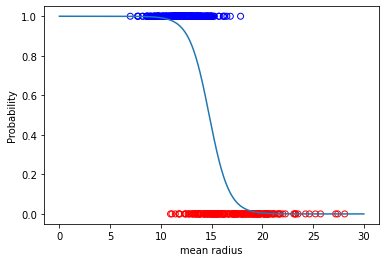

In [11]:
def sigmoid(x):
    return(1/(1+
             np.exp(-(log_regress.intercept_[0]+
                     (log_regress.coef_[0][0]*x)))))

x1=np.arange(0,30,0.01)
y1=[sigmoid(n) for n in x1]

plt.scatter(x,y,
           facecolors='none',
           edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:
                                                          colors[x]),
           cmap=colors)
plt.plot(x1,y1)
plt.xlabel('mean radius')
plt.ylabel('Probability')

### Making Predictions

In [12]:
#---to predict the result if the mean radius is 20---
print(log_regress.predict_proba([[20]]))
print(log_regress.predict([[10]])[0])

[[0.99538685 0.00461315]]
1


## 3.Training Using All Features

In [13]:
#split the dataset into 75 percent training and 25 percent testing set
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels=train_test_split(
                                                        cancer.data,               #features
                                                        cancer.target,             #labels
                                                        test_size=0.25,            #split ratio
                                                        random_state=1,            #set random seed
                                                        stratify=cancer.target)    #randomize based on labels)

In [14]:
#trainign the model using logistic regression
x=train_set[:,0:30]             # All 30 features
y=train_labels                  # 0: malignant, 1: benign
log_regress=linear_model.LogisticRegression()
log_regress.fit(X=x,y=y)

C:\Users\arash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
print(log_regress.intercept_)
print(log_regress.coef_)      #because we trained the model with 30 features, there will  be 30 coefficients.

[0.10472499]
[[ 0.59496539  0.52669161  0.51432129 -0.03172117 -0.01647991 -0.09266283
  -0.13132865 -0.05203015 -0.03026967 -0.00440765  0.02772432  0.14208589
   0.02910518 -0.1083969  -0.00145733 -0.02185856 -0.02994668 -0.00696854
  -0.00568317 -0.00209076  0.68899602 -0.57594025 -0.31401271 -0.00624266
  -0.03329467 -0.31333791 -0.3944766  -0.10637455 -0.08999684 -0.02930298]]


### Testing the model

In [16]:
#---get the predicted probabilities and convert into a dataframe---
preds_prob=pd.DataFrame(log_regress.predict_proba(X=test_set))

#---assign column names to prediction---
preds_prob.columns=["Malignant", "Benign"]

#---get the predicted class labels---
preds=log_regress.predict(X=test_set)
preds_class=pd.DataFrame(preds)
preds_class.columns=["Predictions"]

#---actual diagnosis---
original_results=pd.DataFrame(test_labels)
original_results.columns=["Original Results"]

#---merge the three dataframes into one---
results=pd.concat([preds_prob,preds_class,original_results], axis=1)
print(results.head())

   Malignant        Benign  Predictions  Original Results
0   0.999823  1.772621e-04            0                 0
1   0.999682  3.179203e-04            0                 0
2   0.166083  8.339166e-01            1                 1
3   1.000000  7.000094e-09            0                 0
4   0.089979  9.100209e-01            1                 0


### Confusion Matrix

In [22]:
#---generate table of predictions vs actual---
print("---Confusion Matrix---")
print(pd.crosstab(preds,test_labels))

---Confusion Matrix---
col_0   0   1
row_0        
0      48   4
1       5  86


In [18]:
from sklearn import metrics
#---view the confusion matrix---
print(metrics.confusion_matrix(y_true=test_labels,    #True labels
                              y_pred=preds))          #Predicted labels  

[[48  5]
 [ 4 86]]


### Computing Accuracy, Recall, Precision, and other Metrics

In [29]:
#---get the accuracy of the prediciotn---
print("---Accuracy---")
print(log_regress.score(X=test_set,y=test_labels))
print("")

#---view summary of common classification metrics---
print("---Metric---")
print(metrics.classification_report(y_true=test_labels,
                                   y_pred=preds))

---Accuracy---
0.9370629370629371

---Metric---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



### Receiver4 Operating Characteristic (ROC) Curve

In [30]:
from sklearn.metrics import roc_curve, auc

#---find the predicted probabilities using the test set
probs=log_regress.predict_proba(test_set)
preds=probs[:,1]

#---find the FPR , TPR, and threshold---
fpr, tpr, threshold=roc_curve(test_labels, preds)

print(fpr)
print(tpr)
print(threshold)

[0.         0.         0.         0.01886792 0.01886792 0.03773585
 0.03773585 0.05660377 0.05660377 0.0754717  0.0754717  0.13207547
 0.13207547 0.16981132 0.16981132 0.22641509 0.22641509 1.        ]
[0.         0.01111111 0.66666667 0.66666667 0.87777778 0.87777778
 0.92222222 0.92222222 0.93333333 0.93333333 0.95555556 0.95555556
 0.97777778 0.97777778 0.98888889 0.98888889 1.         1.        ]
[1.99994165e+00 9.99941654e-01 9.80514473e-01 9.80300751e-01
 9.19478415e-01 9.10020864e-01 8.40519758e-01 8.36370693e-01
 8.33916619e-01 7.65683699e-01 7.30451334e-01 2.80884996e-01
 2.66863854e-01 7.27727878e-02 7.09105360e-02 3.22212763e-02
 1.14364931e-02 3.28923230e-20]


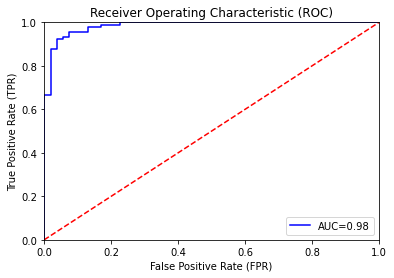

In [31]:
#---find the area under the curve---
roc_auc=auc(fpr, tpr)

plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()